1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd

# 使用绝对路径读取openrank数据集
file_path = r'D:\2023_6\open_rank_20236.csv'
data = pd.read_csv(file_path)

# 取排名前100的项目
top100 = data.head(100)

# value列的最大值、最小值、均值和中位数
max_value = top100['value'].max()
min_value = top100['value'].min()
mean_value = top100['value'].mean()
median_value = top100['value'].median()

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [6]:
import pandas as pd

# 读取 activity_2022 (1) 数据集
file_path = r'D:\2022\activity_2022 (1).csv'
data = pd.read_csv(file_path)

# 每个项目从 20221 到 202212 的增长率
data['growth_rate'] = (data['202212_value'] - data['20221_value']) / data['20221_value'] * 100

# 获取美国前十的项目
top10 = data.head(10)

# 平均增长率
mean_growth_rate = top10['growth_rate'].mean()

print(f"美国排名前十项目的平均增长率: {mean_growth_rate}%")


美国排名前十项目的平均增长率: -4.743700959778462%


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。


中国开源企业描述性统计：
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.25000

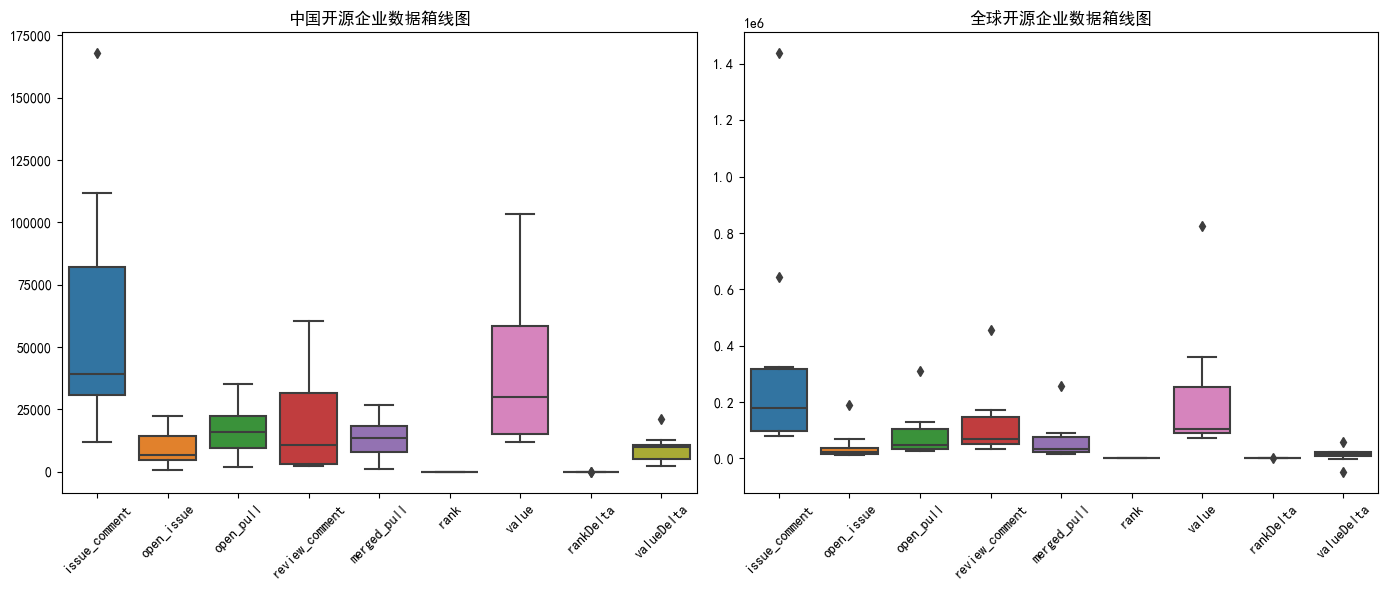

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为黑体
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  

# 读取数据
china_data = pd.read_csv(r"D:\2022\china_2022.csv")
global_data = pd.read_csv(r"D:\2022\global_2022.csv")

# 描述性统计
china_stats = china_data.describe()
global_stats = global_data.describe()

print("\n中国开源企业描述性统计：")
print(china_stats)

print("\n全球开源企业描述性统计：")
print(global_stats)

# 可视化
plt.figure(figsize=(14, 6))

# 绘制中国企业数据的箱线图
plt.subplot(1, 2, 1)
sns.boxplot(data=china_data)
plt.title("中国开源企业数据箱线图")
plt.xticks(rotation=45)

# 绘制全球企业数据的箱线图
plt.subplot(1, 2, 2)
sns.boxplot(data=global_data)
plt.title("全球开源企业数据箱线图")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [11]:
# 定义已知数据
total_projects = 10000
tool_component_ratio = 0.50  # 工具组件型项目占比
system_application_ratio = 0.25  # 系统应用型项目占比
content_resource_ratio = 0.25  # 内容资源型项目占比

# 各类型项目的数量
tool_component_count = total_projects * tool_component_ratio
system_application_count = total_projects * system_application_ratio
content_resource_count = total_projects * content_resource_ratio

# HTML/Markdown 标签的占比
html_markdown_tool_component_ratio = 0.10  # 工具组件型项目中带有标签的占比
html_markdown_content_resource_ratio = 0.85  # 非软件类项目中带有标签的占比

# 带有 HTML/Markdown 标签的项目数量
html_markdown_tool_component_count = tool_component_count * html_markdown_tool_component_ratio
html_markdown_content_resource_count = content_resource_count * html_markdown_content_resource_ratio

# 带有 HTML/Markdown 标签的项目总数
html_markdown_total_count = html_markdown_tool_component_count + html_markdown_content_resource_count

# 带有 HTML/Markdown 标签的项目是非软件型项目的概率
probability_non_software_given_html = html_markdown_content_resource_count / html_markdown_total_count

print(f"带有 HTML/Markdown 标签的项目是非软件型项目的概率: {probability_non_software_given_html:.2%}")


带有 HTML/Markdown 标签的项目是非软件型项目的概率: 80.95%


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [12]:
# 定义已知数据
total_projects = 10000
tool_component_ratio = 0.50  # 工具组件型项目占比
system_application_ratio = 0.25  # 系统应用型项目占比
content_resource_ratio = 0.25  # 内容资源型项目占比

# 各类型项目的数量
tool_component_count = total_projects * tool_component_ratio
system_application_count = total_projects * system_application_ratio
content_resource_count = total_projects * content_resource_ratio

# JavaScript 语言项目的占比
javascript_tool_component_ratio = 0.35  # 工具组件型项目中 JavaScript 的占比
javascript_non_tool_component_ratio = 0.10  # 非工具组件型项目中 JavaScript 的占比

#  JavaScript 项目的数量
javascript_tool_component_count = tool_component_count * javascript_tool_component_ratio
javascript_non_tool_component_count = (system_application_count + content_resource_count) * javascript_non_tool_component_ratio

#  JavaScript 项目的总数
javascript_total_count = javascript_tool_component_count + javascript_non_tool_component_count

#  概率
probability_tool_component_given_javascript = javascript_tool_component_count / javascript_total_count

print(f"由 JavaScript 语言编写的项目是工具组件型项目的概率: {probability_tool_component_given_javascript:.2%}")


由 JavaScript 语言编写的项目是工具组件型项目的概率: 77.78%


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

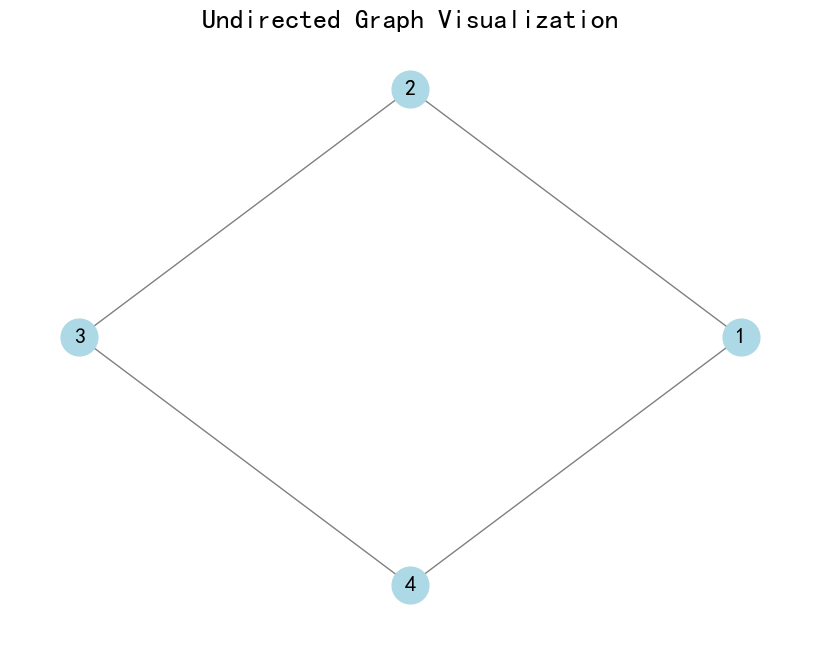

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(user)

# 添加边
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)  # 使用圆形布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', font_weight='bold', edge_color='gray')
plt.title("Undirected Graph Visualization", fontsize=20)
plt.show()


7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

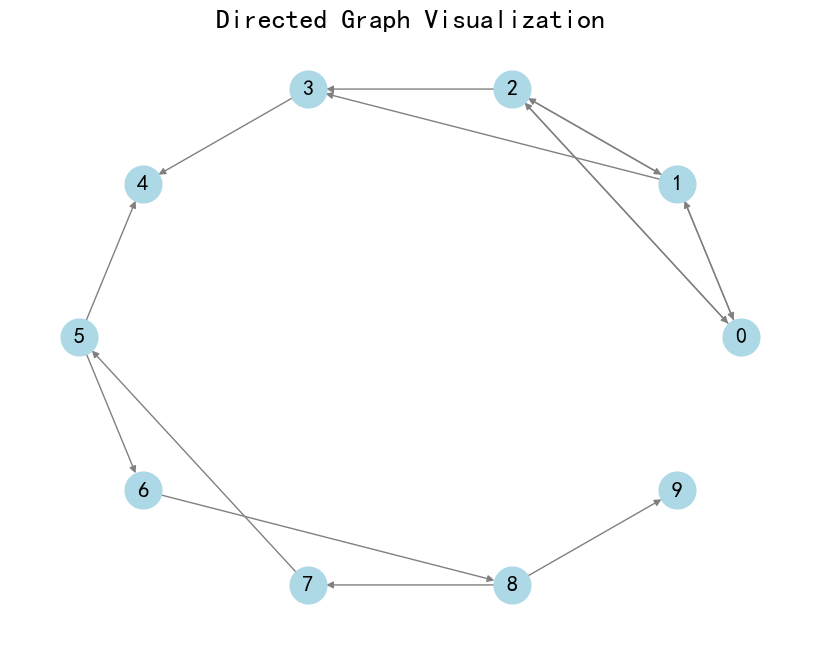

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)  # 使用圆形布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph Visualization", fontsize=20)
plt.show()


8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


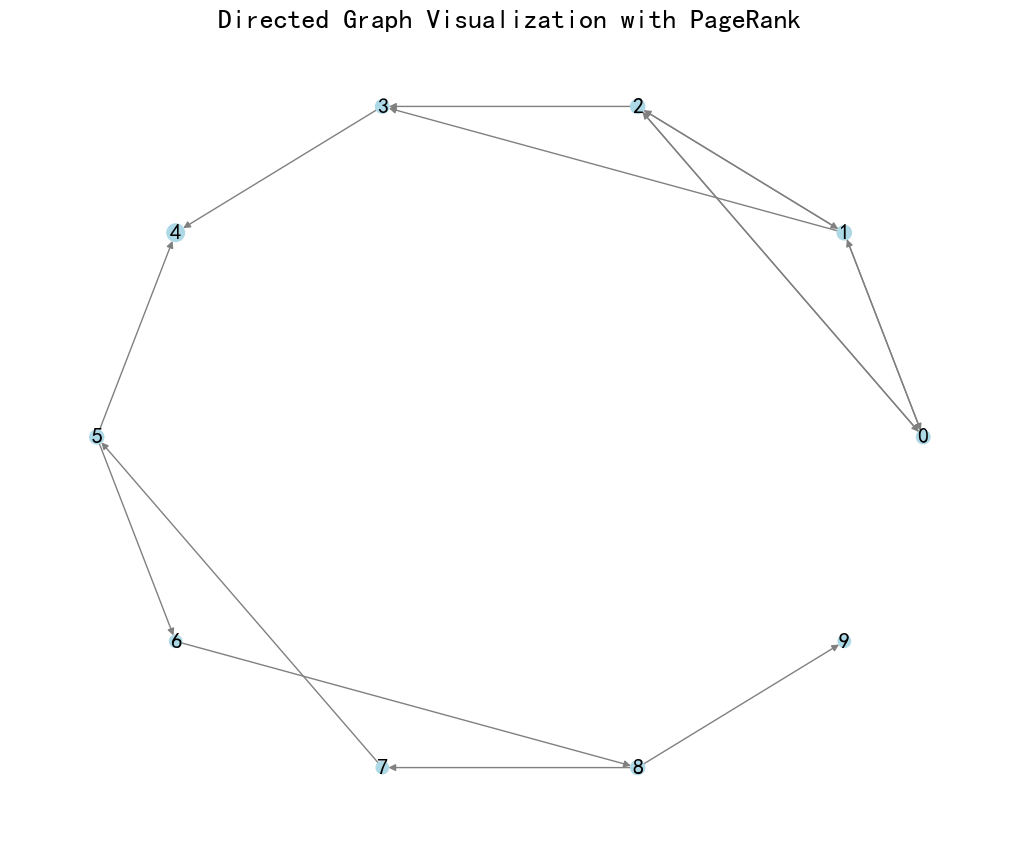

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 每个节点的 PageRank 值
pagerank_values = nx.pagerank(G)

# 输出每个节点的 PageRank 值
for node, value in pagerank_values.items():
    print(f"Node {node}: PageRank = {value:.4f}")

# 根据 PageRank 值调整节点大小
node_sizes = [v * 1000 for v in pagerank_values.values()]  # 放大以便于可视化

# 绘制图形
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G)  # 使用圆形布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=16, font_color='black', font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph Visualization with PageRank", fontsize=20)
plt.show()
